Project Brief

# Clustering - Mall Customers Segmentation

###### Business Objective

- Tob create Customer cluster to identify the different types of customers

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv(r"C:\Users\nikhi\Downloads\DS3_C6_S3_MallCustomers_Data_Project.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### Explore the data

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
#Data preprocessing

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

Gender wise annual income

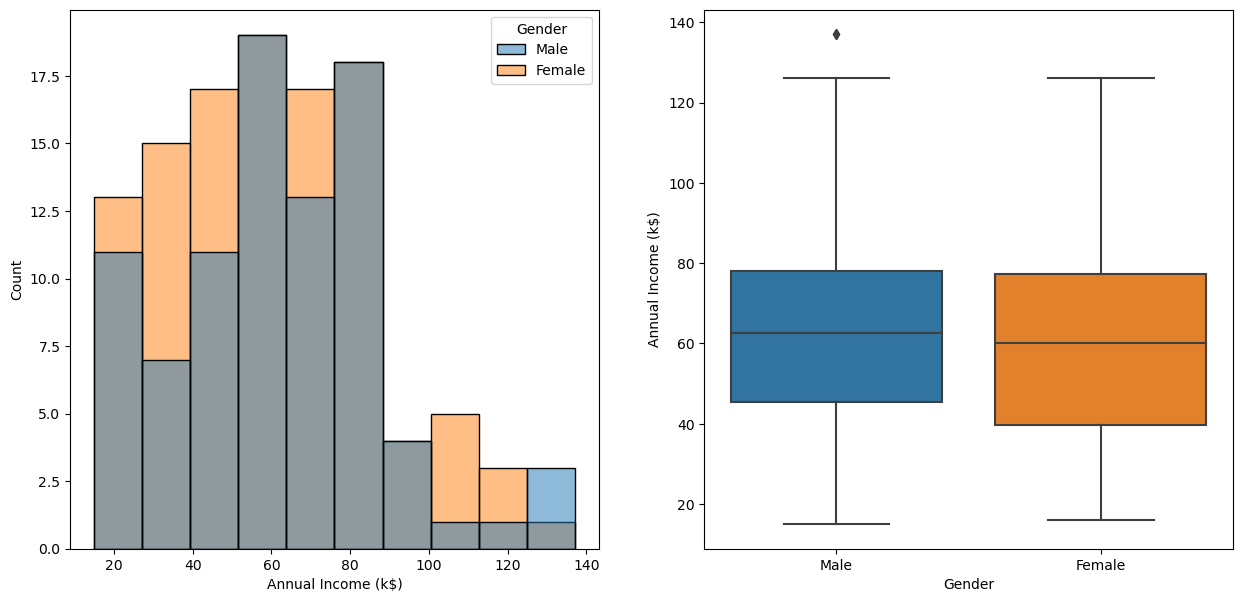

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Annual Income (k$)"], hue = df["Gender"], ax = ax[0])
sns.boxplot(y = df["Annual Income (k$)"], x = df["Gender"], ax = ax[1])
plt.show()

 - Females are having maximum annual income than male

 Gender wise spending score

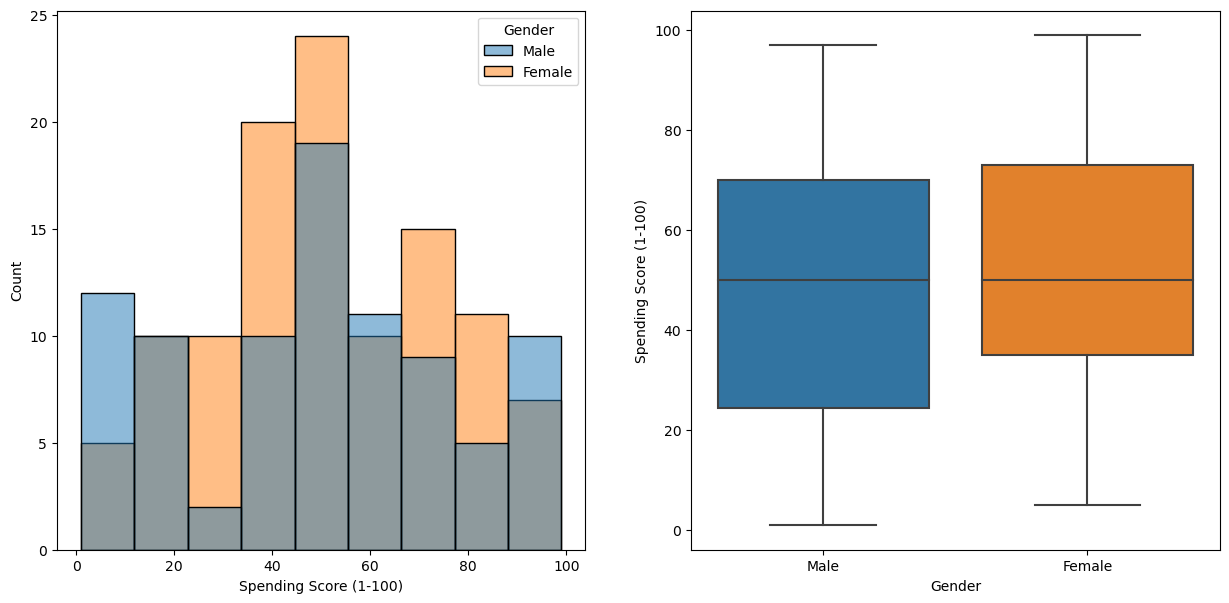

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Spending Score (1-100)"], hue = df["Gender"], ax = ax[0])
sns.boxplot(y = df["Spending Score (1-100)"], x = df["Gender"], ax = ax[1])
plt.show()

 - females are spending more than male

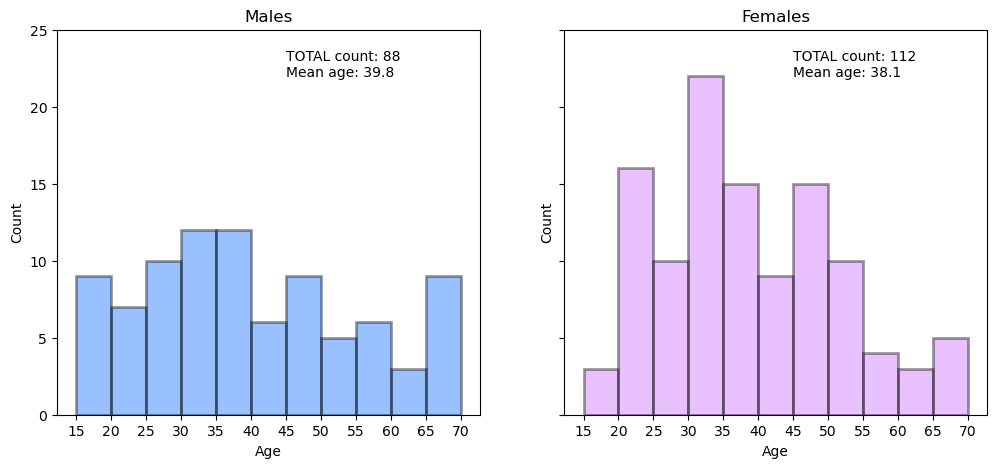

In [13]:
males_age = df[df['Gender']=='Male']['Age'] # subset with males age
females_age = df[df['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

Age wise spending score

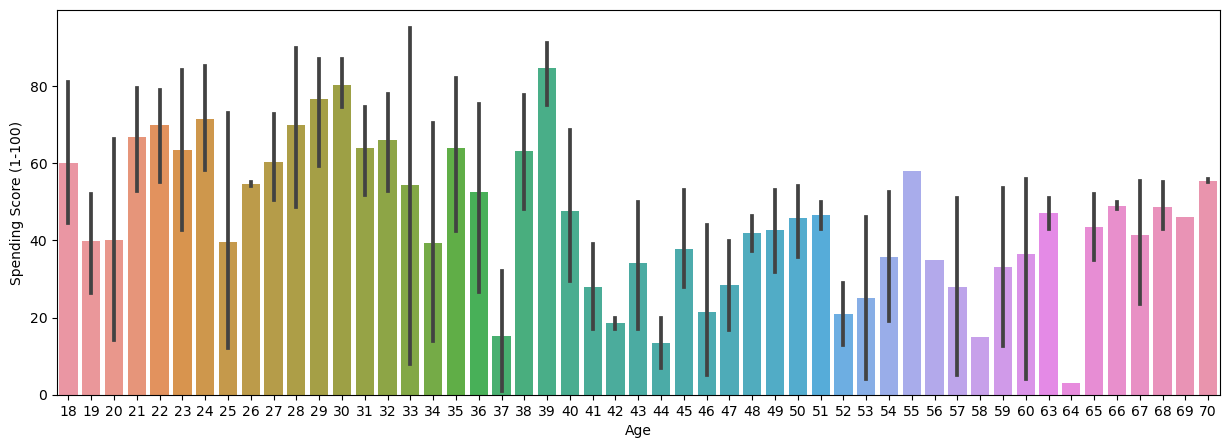

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=df['Age'], y=df['Spending Score (1-100)'],ax=ax)
plt.show()

 - the customers belongs to the age group of 39 have maximum spending scores

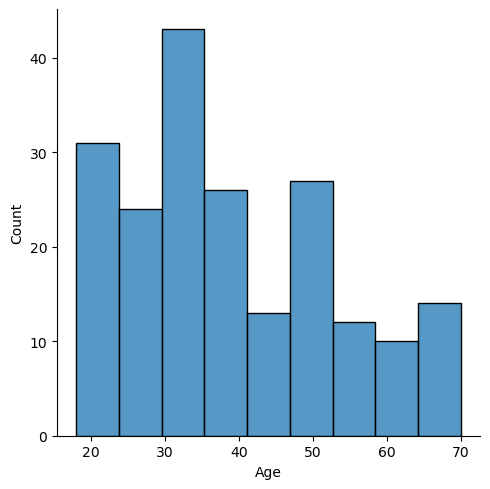

In [95]:
sns.displot(df["Age"])

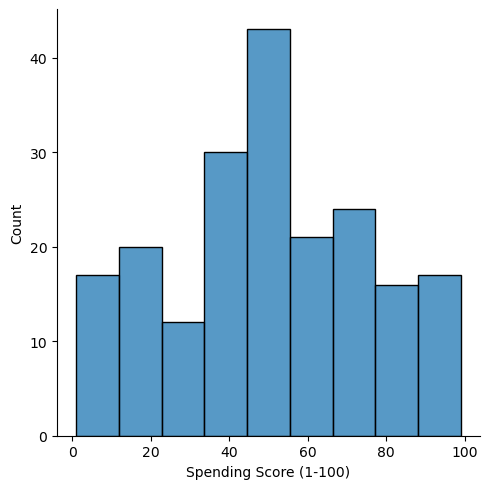

In [78]:
sns.displot(df["Spending Score (1-100)"])

In [14]:
#apply label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

obj=df.select_dtypes(include="object")

for col in obj:
    df[col]=le.fit_transform(df[col])

In [15]:
df.drop(columns=["CustomerID"],inplace=True)

In [16]:
#taking annual income and spending scores because both are important
X=df.iloc[:,[2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(X)

# 1. Apply K- means clustering algorithm

In [18]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

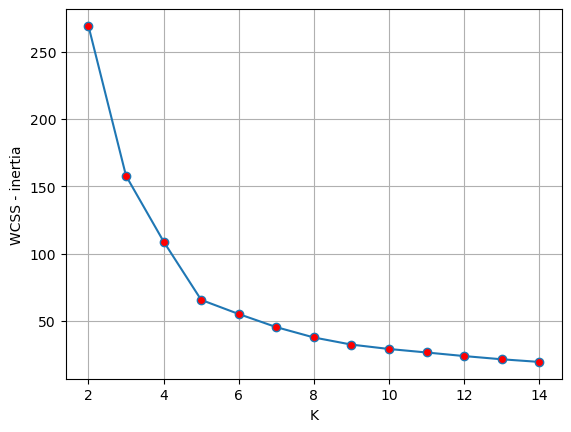

In [19]:
#find the value of k by using elbow method
WCSS=[]

for k in range (2,15):
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(X)
    WCSS.append(kmeans_model.inertia_)
    
plt.plot(range(2, 15), WCSS,marker="o",mfc='red')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WCSS - inertia')
plt.show()    

k = 5  

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
#range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range(3,15):
 # Create a subplot with 1 row and 2 columns
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.46658474419000145
For n_clusters = 4 The average silhouette_score is : 0.4939069237513199
For n_clusters = 5 The average silhouette_score is : 0.5546571631111091
For n_clusters = 6 The average silhouette_score is : 0.5377141165734254
For n_clusters = 7 The average silhouette_score is : 0.45298064520649645
For n_clusters = 8 The average silhouette_score is : 0.4550112502601921
For n_clusters = 9 The average silhouette_score is : 0.45435433918236995
For n_clusters = 10 The average silhouette_score is : 0.4505029621610447
For n_clusters = 11 The average silhouette_score is : 0.4364474909579185
For n_clusters = 12 The average silhouette_score is : 0.42033473615949973
For n_clusters = 13 The average silhouette_score is : 0.41314899745507183
For n_clusters = 14 The average silhouette_score is : 0.4292630037951905


###### Building the model using k= 5

In [21]:
kmodel=KMeans(n_clusters=5)
kmodel.fit(X)

KMeans(n_clusters=5)

In [22]:
#clusters centers
c_centre=kmodel.cluster_centers_
c_centre

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [23]:
#labels of clusters
k_label=kmodel.labels_
k_label

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

visualising the 5 clusters

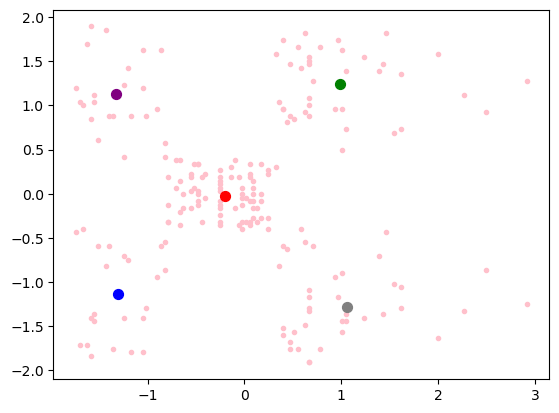

In [24]:
centroid_colors=['red','green','purple','gray','blue']
c=0
plt.scatter(X[ : , 0], X[ : , 1], marker='.', c='pink')
for i,j in c_centre:
    plt.scatter(i,j,s=50, c=centroid_colors[c], marker='o')
    c=c+1
plt.show()

representing the clusters with different colors

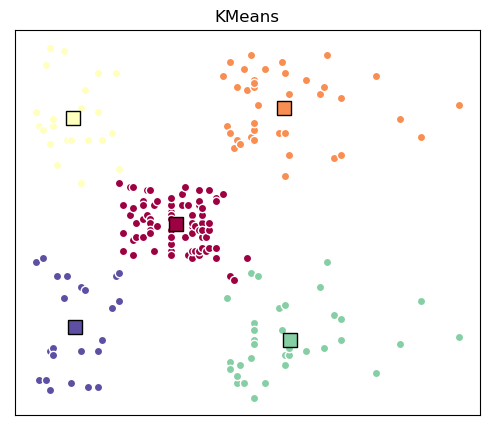

In [25]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 5))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_label))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,5], [0, -1], [2, -3], [1, 2], [5,2]])), colors):
    my_members = (k_label == k)

    # Define the centroid, or cluster center.
    cluster_centroid = c_centre[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1],'w', markerfacecolor=col, marker='o')
    
    #plot centroid
    ax.plot(cluster_centroid[0],cluster_centroid[1], marker='s', markerfacecolor=col, markeredgecolor='k', markersize=10)
    
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

 - In k means 5 clusters are obtained each clusters are having similar information , each clusters formation are on point

# 2. Hierarchical Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

###### plotting dendogram

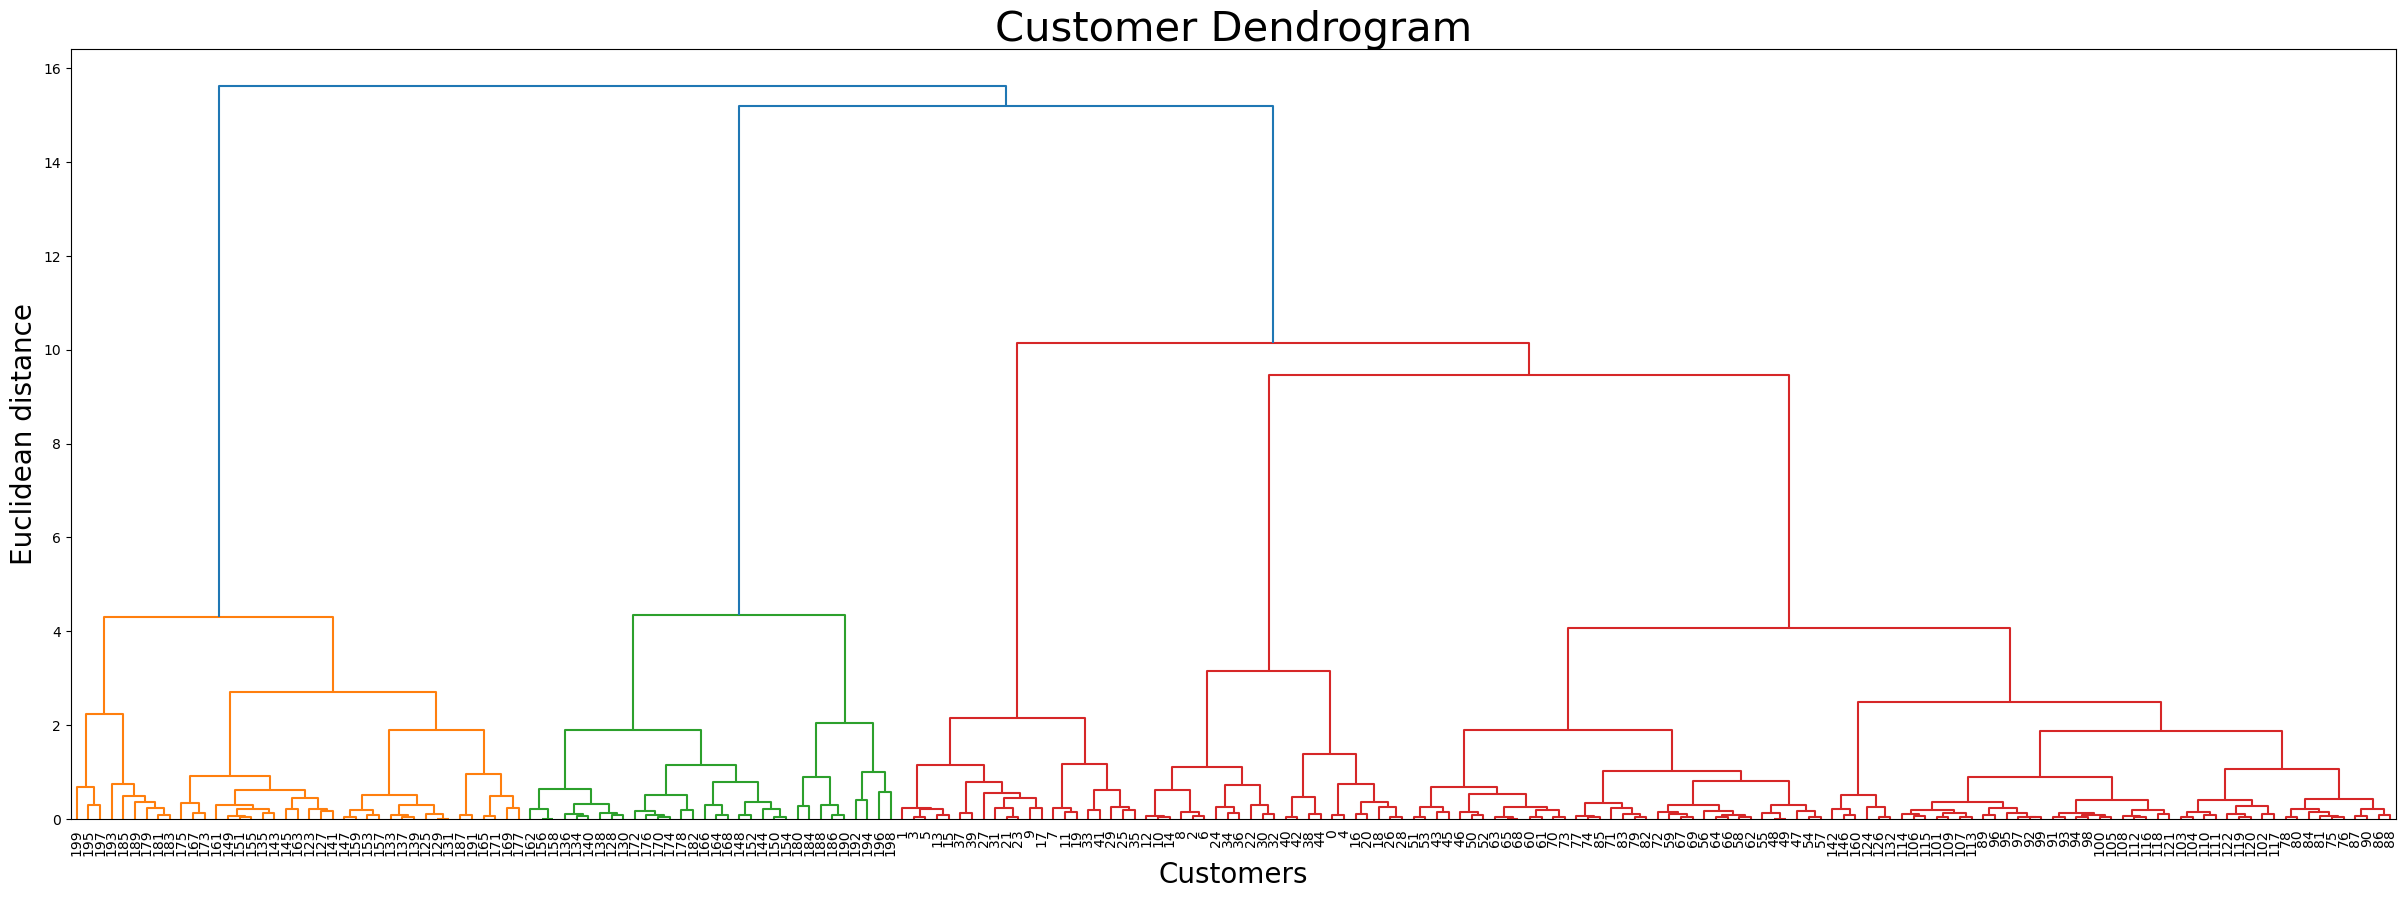

In [27]:
plt.figure(figsize=(30,10))
dendogram=sch.dendrogram(sch.linkage(X,method='ward'),labels=df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.axhline(y=140,c='r',linestyle="--")
plt.show()


 - we are getting 5 clusters which is obtain from dendogram

In [28]:
h_model=AgglomerativeClustering(n_clusters=5,linkage="ward",affinity="euclidean")
h_model.fit(X)

AgglomerativeClustering(n_clusters=5)

In [29]:
h_label=h_model.labels_
h_label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

##### visualising clusters

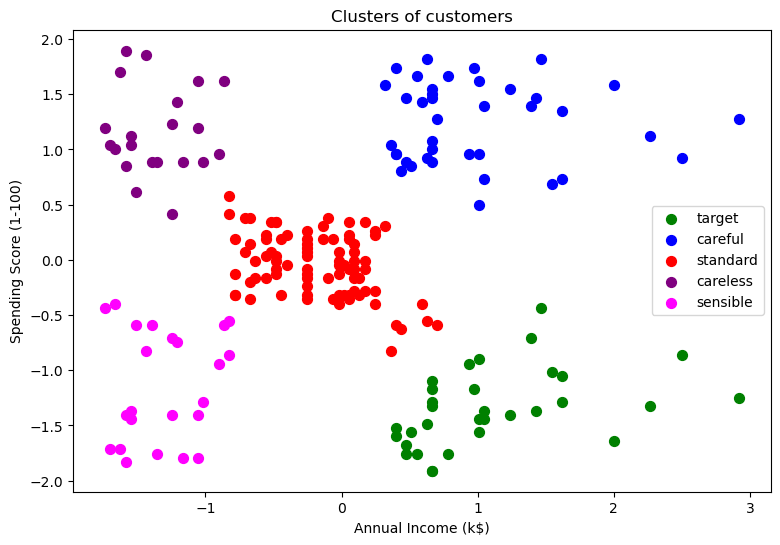

In [30]:
plt.figure(figsize=(9, 6))

plt.scatter(X[h_label==0,0],X[h_label==0,1],s=50,c = 'green', label = 'target')
plt.scatter(X[h_label==1,0],X[h_label==1,1],s=50,c = 'blue', label = 'careful')
plt.scatter(X[h_label==2,0],X[h_label==2,1],s=50,c = 'red', label = 'standard')
plt.scatter(X[h_label==3,0],X[h_label==3,1],s=50,c = 'purple', label = 'careless')
plt.scatter(X[h_label==4,0],X[h_label==4,1],s=50,c = 'magenta', label = 'sensible')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# 3.Dbscan clustering

In [31]:
X=pd.DataFrame(X)

In [32]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors= 2)
nbrs = neigh.fit(X[[0,1]])
distances, indices = nbrs.kneighbors(X[[0,1]])

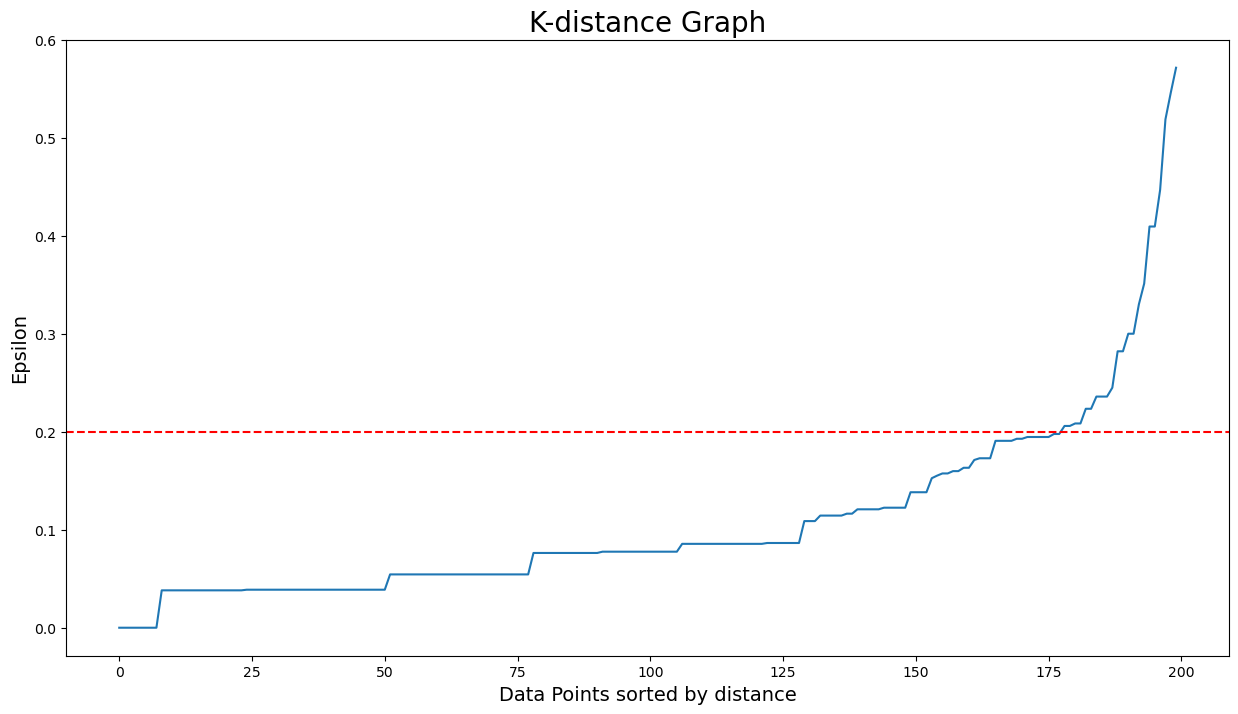

In [33]:
# Plotting K-distance Graph

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.20, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [34]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2,min_samples=4)
dbscan.fit(X[[0,1]])

DBSCAN(eps=0.2, min_samples=4)

In [35]:
X['DBSCAN_opt_labels']=dbscan.labels_
X['DBSCAN_opt_labels'].value_counts() 

 1    79
-1    73
 2    21
 3    14
 0     7
 4     6
Name: DBSCAN_opt_labels, dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

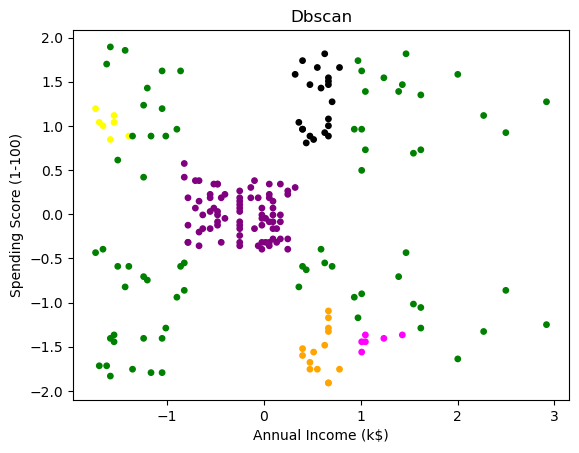

In [37]:
colors=["green","yellow","purple","black","orange","magenta"]
from sklearn import metrics
plt.scatter(X[0], X[1], c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15,marker="o")
plt.title("Dbscan")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

 - five clusters and green one are the outliers

#### - Interpretation:In Kmeans and Heirarchical we are getting good clusters but in db scan algorithm,clusters formations are not good as well as  we are not able to predict the customers in  db scan
 
###### Business interpretation :in heirarchical clusters we are getting 5 clusters with 5 types of different customers are present in data we can clearly see that  so our target should be those customers whose annual income is high but they are not spending that much so to generate revenue we should offers discounts, gifts to those customers who are not spending but they are earning good